$(x_i,y_i)$

$f(x)=kx+b$

$S(p)=\sum[y_i-f(x_i,p)]^2$

In [1]:
%matplotlib inline

r= (array([0.61349535, 1.79409254]), 1)
k = 0.6134953491930442 b = 1.794092543259387


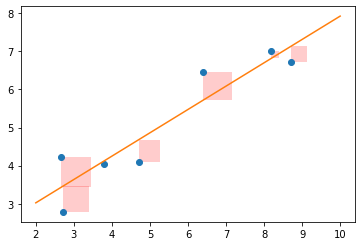

In [2]:
import numpy as np
from scipy.optimize import leastsq, least_squares

X = np.array([ 8.19,  2.72,  6.39,  8.71,  4.7 ,  2.66,  3.78])      #利用list[]賦與np.array初始值
Y = np.array([ 7.01,  2.78,  6.47,  6.71,  4.1 ,  4.23,  4.05])

def residuals(p): 
    #計算以p為参數的直線和原始數據之間的誤差
    k, b = p    # Sequence unpacking, p is a list with two elements. 
    return Y - (k*X + b)

# leastsq使得residuals()輸出數據的平方和最小，leastsq即將廢棄改用least_squares
r = leastsq(residuals, [1, 0])         #要做leastsq的函數是residuals，最小化過程中的初始猜值为[1,0]
#r = least_squares(residuals, [1, 0])
print("r=",r)    #傳回r是一個tuple,第一個元素是一個array，第二個是status flag，代表有無找到解
k, b = r[0]      #透過中括號來存取r這個tuple的第一個內容值
print ("k =",k, "b =",b)


#下面是繪圖部分
import pylab as pl
from matplotlib.patches import Rectangle

pl.plot(X, Y, "o")          #標出資料點
X0 = np.linspace(2, 10, 3)
Y0 = k*X0 + b             #劃出fitting的直線
pl.plot(X0, Y0)

for x, y in zip(X, Y):
    y2 = k*x+b
    rect = Rectangle((x,y), abs(y-y2), y2-y, facecolor="red", alpha=0.2)   #最小方差就是這些正方形的面積和要最小
    pl.gca().add_patch(rect)

pl.gca().set_aspect("equal")
pl.show()



r=  active_mask: array([0., 0.])
        cost: 1.120350129265771
         fun: array([ 0.19138056, -0.6827999 ,  0.75567218, -0.42763702, -0.57752068,
        0.80400982, -0.06310496])
        grad: array([8.61574974e-08, 1.25678624e-08])
         jac: array([[-8.19      , -1.00000002],
       [-2.72      , -0.99999999],
       [-6.38999999, -0.99999999],
       [-8.70999998, -1.00000002],
       [-4.70000005, -0.99999999],
       [-2.65999997, -0.99999999],
       [-3.77999997, -0.99999999]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 4
        njev: 3
  optimality: 8.61574973587409e-08
      status: 3
     success: True
           x: array([0.61349535, 1.79409255])
k = 0.6134953466262745 b = 1.7940925539360972


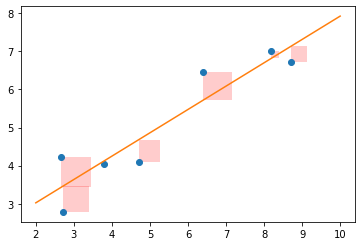

In [3]:
import numpy as np
from scipy.optimize import least_squares

X = np.array([ 8.19,  2.72,  6.39,  8.71,  4.7 ,  2.66,  3.78])      #利用list[]賦與np.array初始值
Y = np.array([ 7.01,  2.78,  6.47,  6.71,  4.1 ,  4.23,  4.05])

def residuals(p): 
    #計算以p為参數的直線和原始數據之間的誤差
    k, b = p    # Sequence unpacking, p is a list with two elements. 
    return Y - (k*X + b)

# leastsq使得residuals()輸出數據的平方和最小，leastsq即將廢棄改用least_squares        
r = least_squares(residuals, [1, 0])     #要做leastsq的函數是residuals，最小化過程中的初始猜值为[1,0]
print("r=",r)    #傳回r是一個numpy的field，其中解是x這個項目。
k, b = r.x      #透過.x來取得解的內容值，Sequence unpacking
print ("k =",k, "b =",b)


#下面是繪圖部分
import pylab as pl
from matplotlib.patches import Rectangle

pl.plot(X, Y, "o")
X0 = np.linspace(2, 10, 3)
Y0 = k*X0 + b
pl.plot(X0, Y0)

for x, y in zip(X, Y):
    y2 = k*x+b
    rect = Rectangle((x,y), abs(y-y2), y2-y, facecolor="red", alpha=0.2)
    pl.gca().add_patch(rect)

pl.gca().set_aspect("equal")
pl.show()



Coefficients: 
 [938.23786125]
Bias: 
 152.91886182616167
Mean squared error: 2548.07
Variance score: 0.47


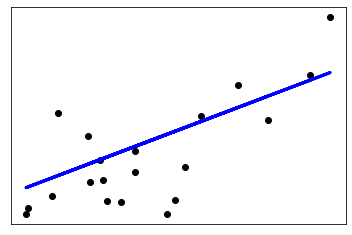

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
#print(diabetes_X.shape)
#print(diabetes_X[:,2])
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
#print(diabetes_X)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Bias: \n', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [array([[-1.78203435, -0.99425312,  8.24854311,  4.94135883,  3.08497255,
         2.11843233]]), array([[-0.86435268,  1.19702467],
       [-0.78905686,  0.62258386],
       [ 5.36543372, -4.55798728],
       [ 3.06498409, -3.11737861],
       [ 2.4358553 , -1.34034817],
       [ 1.76911813, -0.66492688]]), array([[ 6.95759013],
       [-5.98965366]])]
Bias: 
 [array([-0.48672494,  0.99750481,  1.88441612,  0.14110028,  0.26806853,
        0.76044213]), array([ 2.04933516, -1.8628137 ]), array([1.38631995])]
Mean squared error: 3572.41
Variance score: 0.26


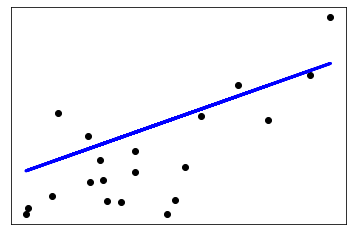

In [5]:
from sklearn.neural_network import MLPRegressor

mlpr =  MLPRegressor(hidden_layer_sizes=(6, 2 ), activation='identity', solver='sgd', alpha=0.0001, batch_size='auto', learning_rate_init=0.0001, max_iter=100000, random_state=49)

# Train the model using the training sets
mlpr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = mlpr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', mlpr.coefs_)
print('Bias: \n', mlpr.intercepts_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
print(diabetes_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [14]:
import pickle

# save the model to disk
filename = 'linear_model.sav'
pickle.dump(regr, open(filename, 'wb'))

# load the model from disk
%timeit loaded_model = pickle.load(open(filename, 'rb'))
# Make predictions using the testing set
diabetes_y_pred = loaded_model.predict(diabetes_X_test)
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

354 µs ± 100 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Variance score: 0.26


In [15]:
import joblib

# save the model to disk
filename = 'mlpr.sav'
joblib.dump(mlpr, filename)

# load the model from disk
%timeit loaded_model = joblib.load(filename)
# Make predictions using the testing set
diabetes_y_pred = loaded_model.predict(diabetes_X_test)
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

6.16 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Variance score: 0.26


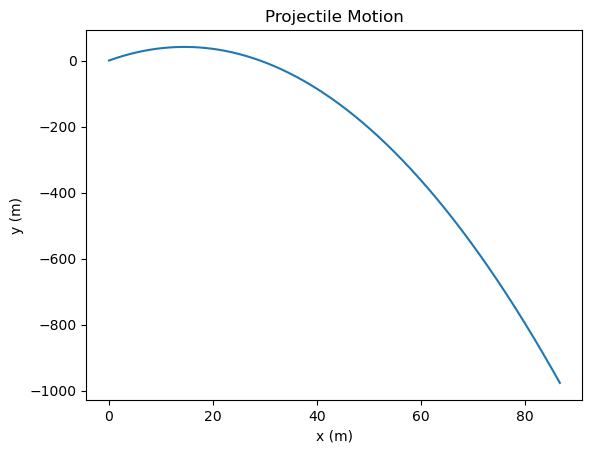

In [3]:
import math

# Set initial conditions
v0 = 50 # initial velocity (m/s)
theta = math.radians(45) # launch angle (degrees)
x0 = 0 # initial x position (m)
y0 = 0 # initial y position (m)
g = 9.81 # acceleration due to gravity (m/s^2)

# Define time step and number of steps
dt = 0.01 # time step (s)
nsteps = 1000 # number of steps to simulate

# Initialize arrays to store x and y positions
x = [x0]
y = [y0]

# Calculate x and y positions at each time step
for i in range(nsteps):
    # Calculate x and y components of velocity
    vx = v0 * math.cos(theta)
    vy = v0 * math.sin(theta) - g * i * dt
    
    # Calculate x and y positions
    xi = x0 + vx * i * dt
    yi = y0 + vy * i * dt - 0.5 * g * (i * dt) ** 2
    
    # Append positions to arrays
    x.append(xi)
    y.append(yi)
    
# Plot the trajectory
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Projectile Motion')
plt.show()
